In [3]:
print("hello, world")

hello, world


In [4]:
import numpy
numpy.__version__

'1.20.3'

In [5]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [19]:
import pandas
pandas.__version__

'1.3.2'

In [7]:
import sklearn
sklearn.__version__

'0.24.2'

In [41]:
import sklearn as sk
import sklearn.datasets as datasets
import sklearn.model_selection as ms
import sklearn.linear_model as lm


boston = datasets.load_boston()
xy = ms.train_test_split(boston.data, boston.target,random_state=1234)
model = lm.LinearRegression().fit(xy[0],xy[2])
print(model.score(xy[0],xy[2]), model.score(xy[1],xy[3]))

0.7301842893511349 0.7325732922440741


0.4100156599252196 0.6394398016047715


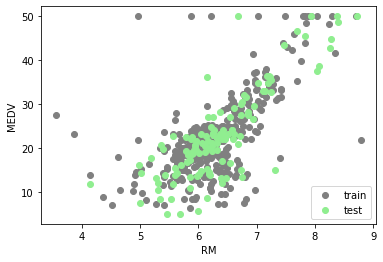

In [85]:
# 步骤3：使用一列
import pandas as pd
boston = datasets.load_boston()
pdata = pd.DataFrame(boston.data, columns=boston.feature_names)
xy = ms.train_test_split(pdata[['RM']].values, boston.target, random_state=1234)
model = lm.LinearRegression().fit(xy[0],xy[2])
print(model.score(xy[0],xy[2]), model.score(xy[1],xy[3]))
from matplotlib import  pyplot as plt
plt.scatter(xy[0],xy[2], c='grey')
plt.scatter(xy[1],xy[3], c='lightgreen')
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.legend(("train","test"),loc="lower right")
plt.show()

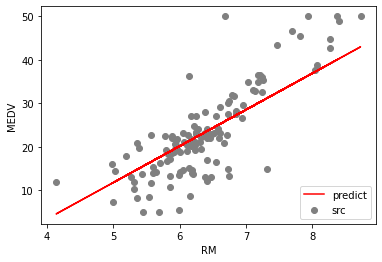

In [86]:
# 步骤3：加上预测结果
predict = model.predict(xy[1])
from matplotlib import  pyplot as plt
plt.scatter(xy[1],xy[3], c='grey')
plt.plot(xy[1], predict, c='red')
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.legend(("predict","src"),loc="lower right")
plt.show()


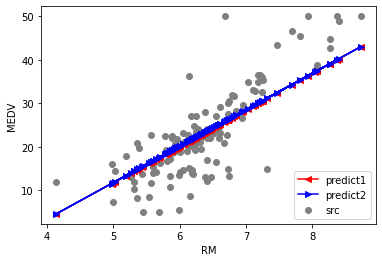

In [89]:
import numpy as np
xi,yi= xy[0], xy[2]
x_mean, y_mean, m = np.mean(xi), np.mean(yi), len(xi)
x_sum, x2_sum, w_up = 0.0,0.0,0.0

for xx,yy in zip(xi, yi):
    x_sum += xx
    x2_sum += xx*xx
    w_up += yy*(xx-x_mean)

w=w_up/(x2_sum-x_sum*x_sum/m)
b=y_mean-w*x_mean
# y=wx+b
predict1 = model.predict(xy[1])
predict2 = [w*x+b for x in xy[1]]


from matplotlib import  pyplot as plt
plt.scatter(xy[1],xy[3], c='grey')
plt.plot(xy[1], predict1, c='red',marker='<')
plt.plot(xy[1], predict2, c='blue',marker='>')
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.legend(("predict1","predict2","src"),loc="lower right")
plt.show()

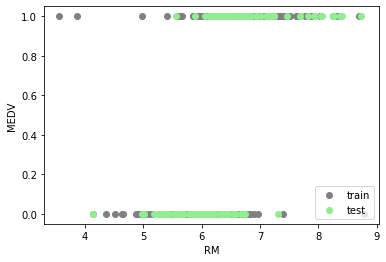

In [92]:
# 步骤5
import numpy as np
y_mean = np.mean(boston.target)
y_classfy = [1 if y>y_mean else 0 for y in boston.target]
xyc = ms.train_test_split(pdata[['RM']].values, y_classfy, random_state=1234)
from matplotlib import  pyplot as plt
plt.scatter(xyc[0],xyc[2], c='grey')
plt.scatter(xyc[1],xyc[3], c='lightgreen')
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.legend(("train","test"),loc="lower right")
plt.show()

In [102]:
import sklearn as sk
import sklearn.linear_model as lm
model = lm.LogisticRegression(max_iter=10000)
model.fit(xyc[0], xyc[2])
print(model.score(xyc[0],xyc[2]),model.score(xyc[1],xyc[3]))




0.7889182058047494 0.8188976377952756
